# Laptop Pricing EDA and Prediction Models.

### Introduction:
This project focuses on unveling insights from a sample laptop pricing dataset from various brands (source: https://www.kaggle.com/datasets/mrsimple07/laptoppriceprediction) and determining which model best predicts the laptop prices. The fore-implemented models are dependent on various laptop attributes that influence consumers to purchase the products.


### Table of contents:
1. Loading the Required Libraries.
2. Loading the Dataset.
3. Data Wrangling.
4. Exploratory Data Analysis.
5. Developing the Pricing Prediction Models.
6. Overall Selection of the Models.
7. Conclusion.
8. Application.

### Loading the required libraries.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy

### Loading the dataset.

In [8]:
df = pd.read_csv("D:\Practice Files July 2024\laptop Pricing Dataset\laptop_pricing_dataset.csv", sep = ",", encoding = "Latin-1")

<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\1071664648.py:1: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv("D:\Practice Files July 2024\laptop Pricing Dataset\laptop_pricing_dataset.csv", sep = ",", encoding = "Latin-1")


#### Exploring the dataset.

In [11]:
## checking the first 10 rows of the dataset

df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [13]:
##  checking the various datatypes 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [15]:
## obtaining a brief summary about the dataset

df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.269615,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.971365,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.624000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.942000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [17]:
## obtaining a more descriptive summary about the dataset

from scipy.stats import describe

numeric = df.drop(["Manufacturer", "Screen"], axis = 1)

description = describe(numeric)

## presenting the output above in an organized manner
for key, value in description._asdict().items():
    print(f"{key} : {value}")

nobs : 238
minmax : (array([  0. ,   1. ,   1. ,   1. ,   3. ,   nan,   1.2,   4. , 128. ,
         nan, 527. ]), array([2.37e+02, 5.00e+00, 3.00e+00, 2.00e+00, 7.00e+00,      nan,
       2.90e+00, 1.60e+01, 2.56e+02,      nan, 3.81e+03]))
mean : [1.18500000e+02 3.20588235e+00 2.15126050e+00 1.05882353e+00
 5.63025210e+00            nan 2.36008403e+00 7.88235294e+00
 2.45781513e+02            nan 1.46234454e+03]
variance : [4.74016667e+03 6.03003227e-01 4.07403468e-01 5.55969223e-02
 1.54203454e+00            nan 1.69243875e-01 6.16331596e+00
 1.20862717e+03            nan 3.30174007e+05]
skewness : [ 0.         -0.64425272 -0.14046264  3.75       -0.33250606         nan
 -0.8747826   1.54417078 -3.10049573         nan  1.26548914]
kurtosis : [-1.20004237  2.25533089 -0.60419327 12.0625     -0.66377598         nan
 -0.61050588  4.65783965  7.61307378         nan  2.37674107]


In [19]:
## determining the shape of the dataset

df.shape

(238, 13)

### Data Wrangling.

This section involves cleaning the dataset and transformining the data for analysis and modelling

#### Removing unwanted columns.

In [23]:
df1 = df.drop(["Unnamed: 0", "Category"], axis = 1)

df1.head(10)

,Manufacturer,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,Acer,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,Dell,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,Dell,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,Dell,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,HP,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,Dell,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,HP,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,Acer,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,Dell,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,Acer,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


#### Dealing with any empty values.

In [26]:
#checking for any null values

df1.isnull().sum()

Manufacturer      0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    4
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         5
Price             0
dtype: int64

In [28]:
## filling the null values

screen_mean = df1["Screen_Size_cm"].mean()
weight_mean = df1["Weight_kg"].mean()

df1["Screen_Size_cm"].fillna(value=screen_mean, inplace=True)
df1["Weight_kg"].fillna(value=weight_mean, inplace=True)

C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\1139184524.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1["Screen_Size_cm"].fillna(value=screen_mean, inplace=True)
C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\1139184524.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [30]:
## checking if there are any null values

df1.isnull().sum()

Manufacturer      0
Screen            0
GPU               0
OS                0
CPU_core          0
Screen_Size_cm    0
CPU_frequency     0
RAM_GB            0
Storage_GB_SSD    0
Weight_kg         0
Price             0
dtype: int64

#### Dealing with duplicates.

In [33]:
df1.duplicated().sum()

0

#### Dealing with outliers.

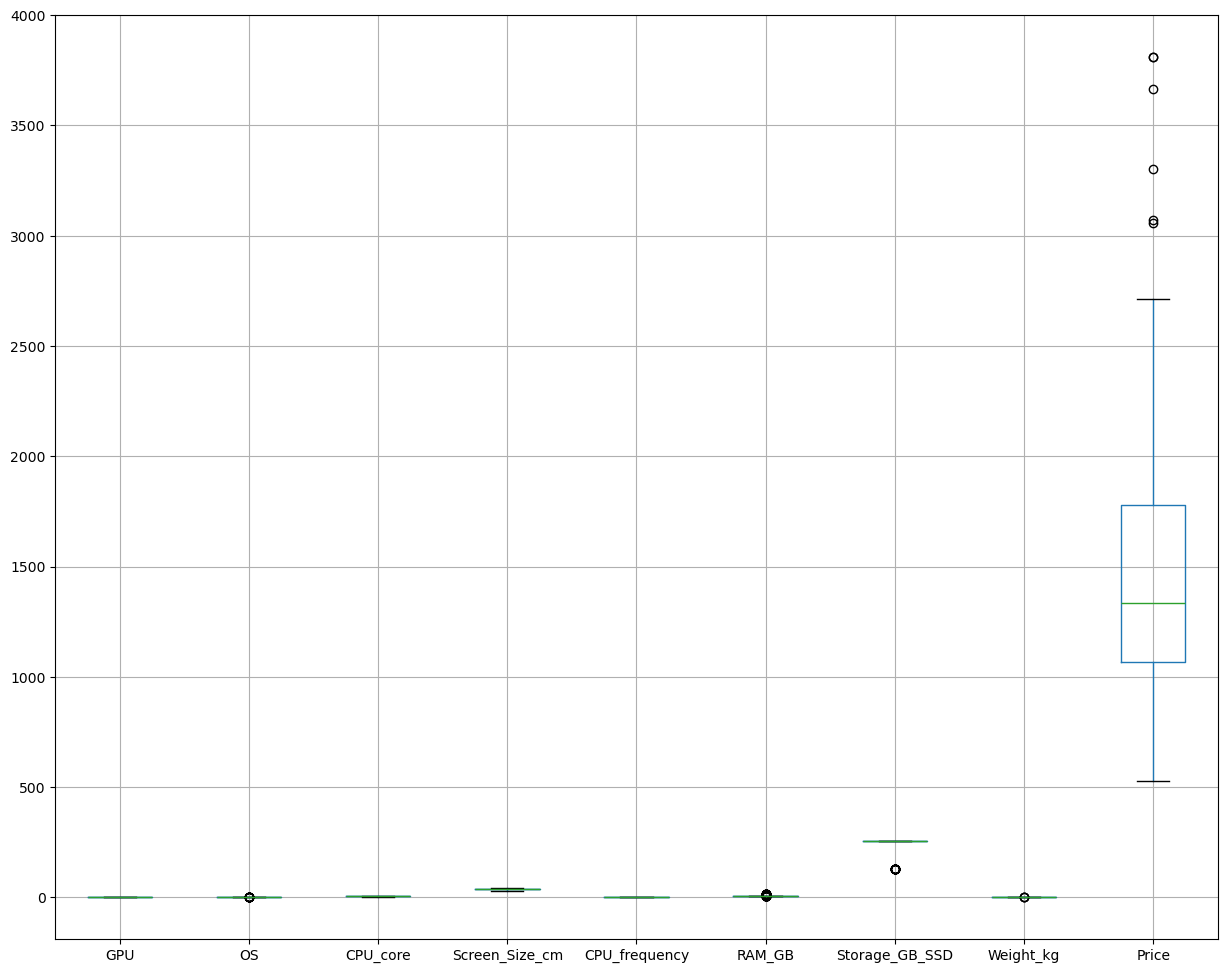

In [36]:
plt.figure(figsize = (15,12))
df1.boxplot()
plt.grid(True)
plt.show()

###### Disclaimer: due to the small size of the dataset, only the outliers in the price column were removed.

In [38]:
## calculating the interquartile range (iqr)

q1 = df1["Price"].quantile(0.25)
q3 = df1["Price"].quantile(0.75)

iqr = q3 - q1

## calculating the upper and lower limits

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 + (1.5 * iqr)

## removing the outliers

df2 = df1.loc[(df1["Price"] < upper_limit) & (df1["Price"] < lower_limit)]

## printing the number of outliers removed
print("Outliers Removed:", len(df1) - len(df2))

Outliers Removed: 27


### Exploratory Data Analysis.

This section entails unveiling hidden insights through data analysis and graphical representations.

In [41]:
## Finding out the number of manifacturers

data = df2

man_unique = data["Manufacturer"].unique()

len(man_unique)

10

In [43]:
## finding out the average price

data["Price"].mean()

1316.0331753554503

In [45]:
## finding out the total weight

data["Weight_kg"].sum()

388.30115879828327

In [47]:
## finding out the average CPU frequency

data["CPU_frequency"].mean()

2.3161137440758295

In [49]:
## finding out the median RAM Size

data["RAM_GB"].median()

8.0

In [51]:
## finding out the maximum SSD Storage

data["Storage_GB_SSD"].max()

256

In [53]:
## finding out the minimum GPU 

data["GPU"].min()

1

In [55]:
## finding out the number of screens

unique_screens = data["Screen"].unique()

len(unique_screens)

2

In [57]:
## finding out the correlation between weight and price

data["Weight_kg"].corr(data["Price"])

-0.4536021696359891

In [59]:
## finding out the distinct number of Operating Systems

data["OS"].unique()

array([1, 2], dtype=int64)

#### Data Visualizations. 

##### Plotting the correlation between variables.

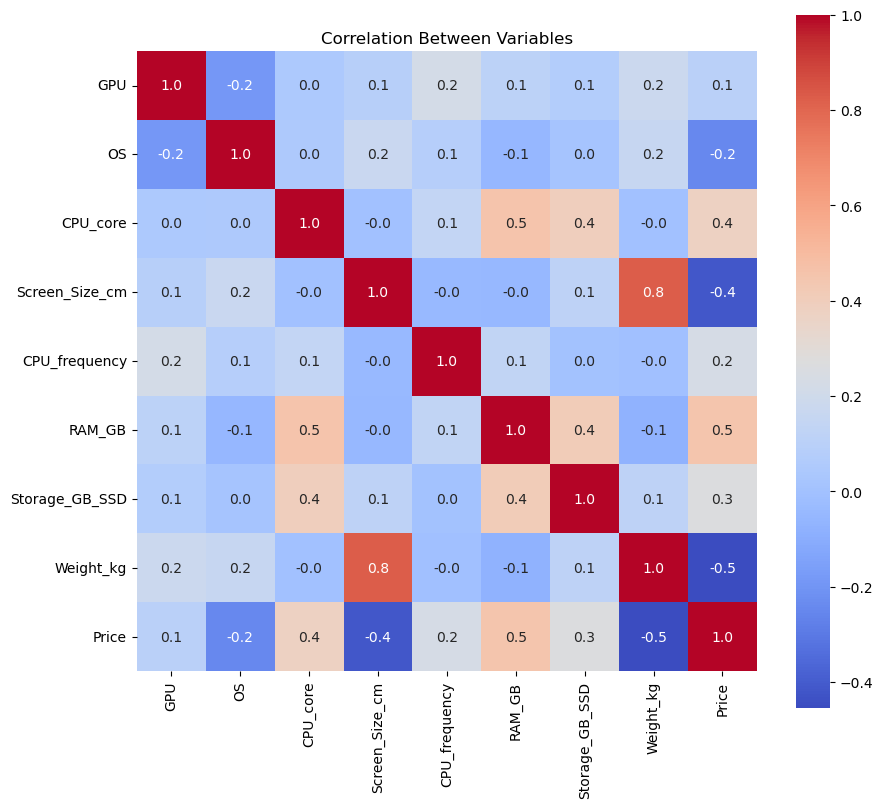

In [63]:
data_num = data.drop(["Manufacturer", "Screen"], axis = 1) ## dripping the categorical variables

correlation = data_num.corr()

plt.figure(figsize = (10,9))
sns.heatmap(data=correlation, annot=True, annot_kws={"size" : 10}, cbar=True, square=True, fmt=".1f",cmap="coolwarm")
plt.title("Correlation Between Variables", loc = "center")
plt.show()

##### Intepretation:
1. There is a strong relationship between Screen Size and Weight.
2. There is a postive relationship between price and weight.
3. Screensize and price have an inverse relationship.
4. RAM size and weight have an almost mutually exclusive relationship.
5. RAM size and price have a positive relationship.

##### Comparing Different Manifacturers With Price Per Screen.

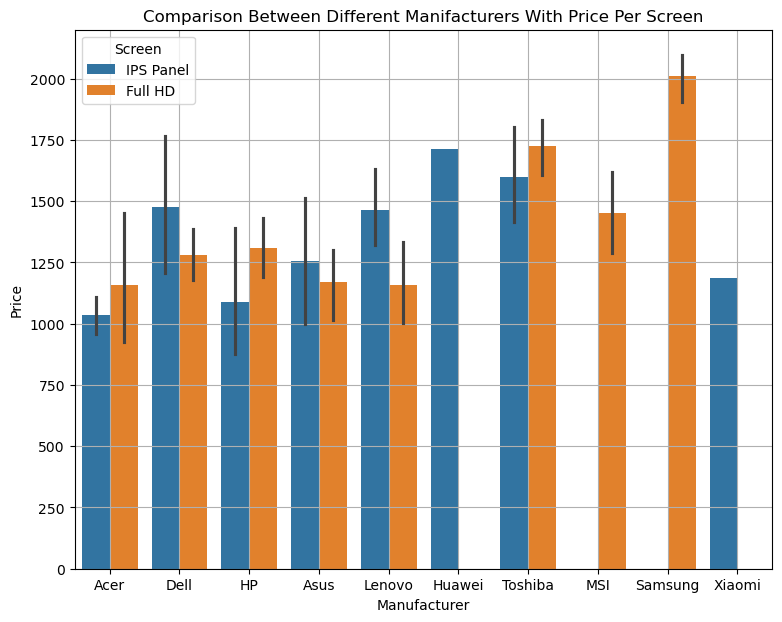

In [67]:
plt.figure(figsize = (9,7))
sns.barplot(data= data, x= "Manufacturer", y="Price", hue="Screen", legend=True)
plt.grid(True)
plt.title("Comparison Between Different Manifacturers With Price Per Screen", loc = "center")
plt.show()

##### Interpretation:
1. Full HD Screens have the most price for Samsung laptops.
2. IPS Panel Screens have the most price for Huawei laptops.
3. Samsung laptops are the most expensive while Acer laptops are the cheapest.
4. Huawei and Xiaomi laptops have only IPS Panel screens.
5. Samsung laptops have only Full HD Screens.

##### Comparing Different Manifacturers With Storage Per Screen.

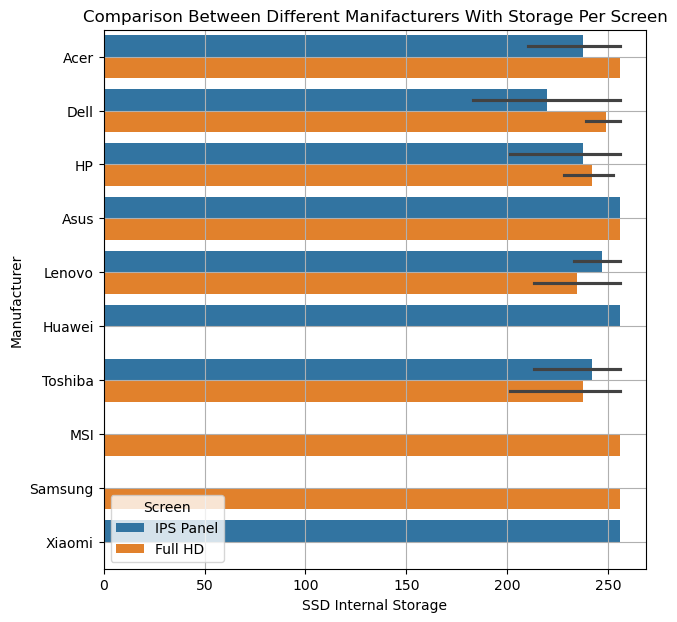

In [71]:
plt.figure(figsize = (7,7))
sns.barplot(data= data, y= "Manufacturer", x="Storage_GB_SSD", hue="Screen", legend=True)
plt.xlabel("SSD Internal Storage")
plt.grid(True)
plt.title("Comparison Between Different Manifacturers With Storage Per Screen", loc = "center")
plt.show()

##### Insights:
1. HP, Toshiba and Lenovo laptops have smaller SSD Internal Storage as compared to others.
2. Asus laptops have larger SSD Internal Storage for both screens.
3. Huawei and Xiaomi laptops have only IPS Panel screens.
4. Samsung laptops has only Full HD Screens.

##### Finding the distribution of price.

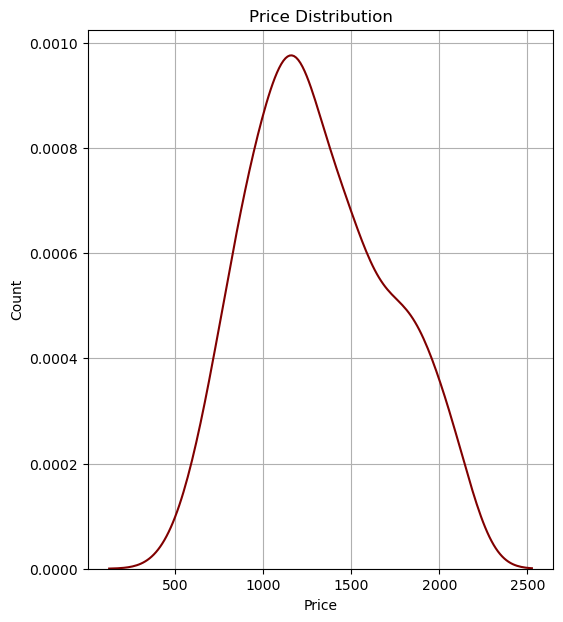

In [75]:
plt.figure(figsize = (6,7))
sns.kdeplot(data=data, x = "Price", color = "maroon")
plt.xlabel("Price")
plt.ylabel("Count")
plt.grid(True)
plt.title("Price Distribution", loc = "center")
plt.show()

##### Interpretation :
The price has a normal distribution as it is symmetric about the mean.

### Developing Price Prediction Models.

This section entails developing machine learning models to predict the price for the laptops produced by the various manufacturers accoring to their characteristsics. The key focus is to find out which machine learning model best predicts the laptops' price.

#### Preparing the dataset for model building.

In [80]:
## Categorizing the values

data["Manufacturer"].unique()

data["Manufacturer"] = data["Manufacturer"].replace({
    'Acer' : 1,
    'Dell' : 2,
    'HP' : 3,
    'Asus': 4,
    'Lenovo' : 5,
    'Huawei' : 6,
    'Toshiba' : 7,
    'MSI' : 8,
    'Samsung' : 9,
    'Xiaomi' : 10
})

data["Screen"] = data["Screen"].replace({
    "IPS Panel" : 1,
    "Full HD" : 2
})

C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\3937410719.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Manufacturer"] = data["Manufacturer"].replace({
C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\3937410719.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Manufacturer"] = data["Manufacturer"].replace({
C:\Users\Alvin\AppData\Local\Temp\ipykernel_43352\3937410719.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old 

In [82]:
data.head()

,Manufacturer,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,1,1,2,1,5,35.560,1.6,8,256,1.60,978
1,2,2,1,1,3,39.624,2.0,4,256,2.20,634
2,2,2,1,1,7,39.624,2.7,8,256,2.20,946
3,2,1,2,1,5,33.782,1.6,8,128,1.22,1244
4,3,2,2,1,7,39.624,1.8,8,256,1.91,837


#### Developing the models.

#### Defining the dependent and independent variables.

In this case, we are predicting the price hence we are using the other variables as independent avriables reprsented by X while price being the dependent variable we are representing it by y.

In [86]:
X = data.drop(["Price"], axis = 1)
y = data["Price"]

#### Dividing the model into training and testing splits.

In order to fully implement the models, the dependent and independent variables need to be divided into training and testing sets.

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

#### Implementing the various models
This sub-section seeks to implement and determine the performance of the following pricing models:
1. Linear Regression.
2. Random Forest Regressor.
3. Ada Boost Regressor.
4. Bagging Regressor.
5. Extra Trees Regressor.
6. Decision Trees Regressor.
7. XGBoost Regressor.
8. XGBRF Regressor.
9. SVM Regressor.
10. Linear SVM Regressor.
11. Gamma Regressor.

#### 1. Linear Regression.

In [93]:
## loading the model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [95]:
## fitting the model

lr.fit(X_train,y_train)

LinearRegression()

In [97]:
## printing the intercept

lr.intercept_

1300.7405529736398

In [99]:
## printing the coefficients

coefficients = pd.DataFrame([X_train.columns, lr.coef_]).T
coefficients = coefficients.rename(columns = {0: "Attribute", 1: "Coefficients"})
coefficients

,Attribute,Coefficients
0,Manufacturer,21.796831
1,Screen,25.186539
2,GPU,24.768298
3,OS,-253.659671
4,CPU_core,49.979677
5,Screen_Size_cm,-19.054224
6,CPU_frequency,170.387652
7,RAM_GB,46.602799
8,Storage_GB_SSD,1.487276
9,Weight_kg,-309.235398


In [101]:
## predicting the model

pred = lr.predict(X_test)
pred

array([1280.70754984, 1488.64979934, 1361.85539996, 1036.90059132,
       1104.69954436, 1393.00685443,  820.16584336, 1719.51681967,
       1108.83400507, 1417.13771063, 1577.41321273,  534.70187896,
       1024.84653742, 1240.04977545, 1367.57133085, 1124.24260592,
       1227.65566625, 1610.79071164, 1585.9323967 ,  992.31105066,
       1397.4101726 , 1315.68429967, 1138.39763014, 1591.50045841,
        992.31105066,  693.98512627, 1489.31293004, 1006.57703952,
       1697.18978603, 1230.15299119,  878.09540893, 1537.36296364,
       1517.57542882, 1613.12775804, 1340.58957566, 1295.72758465,
        984.45380014, 1645.88318913, 1481.12247078, 1451.85268239,
       1140.61392431, 1073.41646089, 1263.37328781, 1294.32294238,
       1580.18587756, 1465.64789336,  902.86370653,  752.91736881,
       1240.78005427, 1732.15747517, 1087.09356927, 1733.5347642 ,
       1361.23627022])

In [103]:
## Linear Regression Metrics 

from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error , mean_squared_error

print("Mean Absolute Error:", mean_absolute_error(y_test, pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,pred))
print("Mean Squared Error:", mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred)))
print("R-Squared Error:", r2_score(y_test, pred))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 272.6549458046057
Mean Absolute Percentage Error: 0.2180994177081368
Mean Squared Error: 99570.72231306447
Root Mean Squared Error: 315.548288401418
R-Squared Error: 0.2628872221585552
Adjusted R-Squared Error: -10.737112777841444


#### 2. Random Forest Regressor.

In [106]:
## loading the model

from sklearn.ensemble import RandomForestRegressor

In [108]:
## defining the regressor 

rc = RandomForestRegressor()

In [110]:
## fitting the model

rc.fit(X_train, y_train)

RandomForestRegressor()

In [112]:
## predicting the model

pred_rc = rc.predict(X_test)
pred_rc

array([1176.66666667, 1337.89      , 1884.31      , 1183.92666667,
        825.55      , 1287.51      ,  882.42      , 1596.864     ,
       1157.96      , 1548.68      , 1903.06      ,  624.3       ,
        885.75      , 1115.95666667, 1283.69333333, 1215.46      ,
       1293.3       , 1386.74333333, 1833.79      , 1340.28      ,
       1280.83      ,  853.62      , 1255.48666667, 1900.19      ,
       1340.28      , 1245.72      , 1992.65      , 1053.31      ,
       1768.80328571, 1929.66428571, 1144.50666667, 1329.21      ,
       1498.23      , 1719.012     , 1345.01      ,  921.44      ,
        877.32      , 1599.93666667, 1460.77      , 1585.89      ,
       1093.8       ,  897.2       , 1253.77      , 1128.94      ,
       1798.39      , 1233.31      , 1220.42666667, 1041.17      ,
       1111.77      , 1782.122     , 1333.96      , 1818.71      ,
       1267.19      ])

In [114]:
## Random Forest Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_rc))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,pred_rc))
print("Mean Squared Error:", mean_squared_error(y_test,pred_rc))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_rc)))
print("R-Squared Error:", r2_score(y_test, pred_rc))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_rc)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 223.05820754716976
Mean Absolute Percentage Error: 0.17424103237848657
Mean Squared Error: 88503.3969055853
Root Mean Squared Error: 297.49520484469207
R-Squared Error: 0.3448176007364335
Adjusted R-Squared Error: -10.655182399263566


#### 3. AdaBoost Regressor.

In [117]:
## loading the regressor

from sklearn.ensemble import AdaBoostRegressor

In [119]:
## defining the regressor

ada_reg = AdaBoostRegressor()

In [121]:
## fitting the regressor

ada_reg.fit(X_train,y_train)

AdaBoostRegressor()

In [123]:
## predicting the model

pred_ada_reg = ada_reg.predict(X_test)
pred_ada_reg

array([1295.86666667, 1407.        , 1779.69230769, 1224.59722222,
        807.6       , 1301.63529412,  885.58333333, 1760.7       ,
       1224.59722222, 1453.8030303 , 1779.69230769,  802.67857143,
        914.92105263, 1186.33333333, 1366.68627451, 1302.44303797,
       1289.76237624, 1542.        , 1689.4875    , 1336.51612903,
       1379.52      , 1090.89655172, 1289.76237624, 1731.02777778,
       1336.51612903, 1228.65517241, 1802.81481481, 1186.33333333,
       1685.5       , 1731.02777778, 1186.33333333, 1379.        ,
       1336.51612903, 1731.02777778, 1358.62765957, 1366.68627451,
       1019.        , 1663.10606061, 1633.1       , 1336.51612903,
       1177.17647059,  913.        , 1379.52      , 1358.62765957,
       1731.02777778, 1351.55555556, 1224.59722222, 1179.425     ,
       1213.        , 1731.02777778, 1287.21428571, 1805.        ,
       1366.68627451])

In [125]:
## AdaBoost Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_ada_reg))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,pred_ada_reg))
print("Mean Squared Error:", mean_squared_error(y_test,pred_ada_reg))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_ada_reg)))
print("R-Squared Error:", r2_score(y_test, pred_ada_reg))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_ada_reg)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 245.5926502397073
Mean Absolute Percentage Error: 0.1997618221497118
Mean Squared Error: 90504.61183638159
Root Mean Squared Error: 300.8398441636041
R-Squared Error: 0.33000279310594316
Adjusted R-Squared Error: -10.669997206894056


#### 4. Bagging Regressor.

In [128]:
## loading the regressor

from sklearn.ensemble import BaggingRegressor

In [130]:
## fitting the model

bag_reg = BaggingRegressor()

bag_reg.fit(X_train, y_train)

BaggingRegressor()

In [132]:
## predicting the model

pred_bag = bag_reg.predict(X_test)
pred_bag

array([1156.5       , 1388.        , 1963.3       , 1109.7       ,
        854.9       , 1220.6       ,  862.        , 1641.7       ,
       1080.6       , 1502.9       , 2020.5       ,  679.2       ,
        918.8       , 1170.5       , 1298.3       , 1275.9       ,
       1225.5       , 1207.        , 1827.43333333, 1412.1       ,
       1273.5       ,  840.6       , 1172.5       , 1828.3       ,
       1412.1       , 1194.1       , 2050.        , 1052.2       ,
       1744.        , 1933.13333333, 1042.7       , 1208.3       ,
       1294.7       , 1738.9       , 1402.6       ,  865.9       ,
        885.5       , 1686.        , 1662.2       , 1527.7       ,
       1087.8       ,  901.6       , 1221.        , 1127.6       ,
       1705.53333333, 1274.5       , 1077.2       , 1031.5       ,
       1071.3       , 1777.2       , 1313.3       , 1813.8       ,
       1290.4       ])

In [134]:
## Bagging Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_bag))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,pred_bag))
print("Mean Squared Error:", mean_squared_error(y_test,pred_bag))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_bag)))
print("R-Squared Error:", r2_score(y_test, pred_bag))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_bag)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 239.12893081761007
Mean Absolute Percentage Error: 0.18691987298469054
Mean Squared Error: 98384.06509433963
Root Mean Squared Error: 313.66234248685265
R-Squared Error: 0.2716719349588671
Adjusted R-Squared Error: -10.728328065041133


#### 5. Extra Trees Regressor.

In [137]:
##loading the regressor

from sklearn.ensemble import ExtraTreesRegressor

In [139]:
## fitting the regressor

extratrees_reg = ExtraTreesRegressor()

extratrees_reg.fit(X_train, y_train)

ExtraTreesRegressor()

In [141]:
## predicting the model

pred_extratrees = extratrees_reg.predict(X_test)
pred_extratrees

array([1087.63, 1213.  , 1593.82, 1361.7 ,  831.65, 1345.94,  844.74,
       1531.32, 1277.3 , 1534.5 , 1724.51,  550.54,  964.39, 1110.41,
       1414.74, 1022.38, 1286.84, 1561.25, 1841.  , 1273.62, 1346.82,
        906.12, 1190.61, 1873.36, 1273.62, 1345.49, 1943.08, 1016.  ,
       1741.24, 1791.89, 1119.69, 1354.1 , 1479.  , 1728.89, 1426.93,
       1129.8 , 1031.48, 1666.92, 1199.15, 1656.  , 1167.  ,  893.3 ,
       1435.18, 1088.65, 1705.09, 1276.52, 1379.37,  978.34, 1139.09,
       1875.92, 1344.75, 1780.94, 1355.97])

In [143]:
## Extratrees Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_extratrees))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,pred_extratrees))
print("Mean Squared Error:", mean_squared_error(y_test,pred_extratrees))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_extratrees)))
print("R-Squared Error:", r2_score(y_test, pred_extratrees))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_extratrees)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 213.55716981132073
Mean Absolute Percentage Error: 0.1669899370532665
Mean Squared Error: 72907.56039056604
Root Mean Squared Error: 270.0140003602888
R-Squared Error: 0.46027212501117143
Adjusted R-Squared Error: -10.539727874988829


#### 6. Decision Trees Regressor.

In [146]:
## loading the regressor

from sklearn.tree import DecisionTreeRegressor

In [148]:
## fitting the regressor

dec_tree_reg = DecisionTreeRegressor()

dec_tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [150]:
## predicting the model

dec_pred = dec_tree_reg.predict(X_test)
dec_pred

array([ 977., 1213., 1696., 1420., 1066., 1453., 1053., 1777., 1452.,
       1507., 1696.,  634., 1053., 1118.,  977., 1561., 1294., 1396.,
       1841., 1057.,  934.,  883., 1396., 1904., 1057., 1452., 2082.,
       1016., 1874., 2069.,  939., 1091., 1953., 1206., 1396.,  735.,
        888., 1696., 1815., 1656., 1167.,  735.,  925.,  978., 1195.,
        888., 1452., 1016.,  975., 2054., 1419., 1696.,  977.])

In [152]:
## Decision Tree Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, dec_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,dec_pred))
print("Mean Squared Error:", mean_squared_error(y_test,dec_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,dec_pred)))
print("R-Squared Error:", r2_score(y_test, dec_pred))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, dec_pred)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 305.24528301886795
Mean Absolute Percentage Error: 0.24005833620668907
Mean Squared Error: 153026.22641509434
Root Mean Squared Error: 391.1856674459001
R-Squared Error: -0.13283889295060503
Adjusted R-Squared Error: -11.132838892950605


#### 7. XGBoost Regressor.

In [155]:
## loading the regressor

from xgboost import XGBRegressor

In [157]:
## fitting the model

xgb_reg = XGBRegressor()

xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [159]:
## predicting the model

xgb_pred = xgb_reg.predict(X_test)
xgb_pred

array([1113.9126 , 1212.8933 , 1939.6249 , 1251.2609 ,  767.9419 ,
       1537.7937 ,  884.77313, 1354.1113 , 1085.1263 , 1429.4312 ,
       1924.4806 ,  598.73126,  889.6405 , 1037.1764 , 1205.0016 ,
       1199.693  , 1239.5646 , 1518.2571 , 1840.9194 , 1272.5537 ,
       1544.1265 ,  812.92035, 1169.065  , 1890.8414 , 1272.5537 ,
       1184.1901 , 2080.3708 , 1017.97473, 1762.5344 , 2038.4683 ,
       1085.229  , 1198.8165 , 1394.6812 , 1429.1888 , 1352.9252 ,
       1064.0844 ,  927.1494 , 1355.6105 , 1556.864  , 1654.8096 ,
       1163.3706 ,  870.0295 , 1428.3042 , 1105.4717 , 1586.8828 ,
       1292.0237 , 1190.9833 ,  960.8937 , 1043.474  , 1812.7844 ,
       1412.5079 , 1889.0123 , 1213.5597 ], dtype=float32)

In [161]:
## XGBoost Regressor

print("Mean Absolute Error:", mean_absolute_error(y_test, xgb_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,xgb_pred))
print("Mean Squared Error:", mean_squared_error(y_test,xgb_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,xgb_pred)))
print("R-Squared Error:", r2_score(y_test, xgb_pred))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, xgb_pred)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 214.73949504348468
Mean Absolute Percentage Error: 0.16561152768633308
Mean Squared Error: 95833.10757820505
Root Mean Squared Error: 309.5692290558043
R-Squared Error: 0.2905564357156397
Adjusted R-Squared Error: -10.70944356428436


#### 8. XGBRF Regressor.

In [164]:
## loading the regressor

from xgboost import XGBRFRegressor

In [166]:
## fitting the regressor

xgbf_reg = XGBRFRegressor()

xgbf_reg.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [168]:
## predicting the model 

xgbf_pred = xgbf_reg.predict(X_test)
xgbf_pred

array([1274.759  , 1306.1245 , 1831.778  , 1168.9692 ,  800.8899 ,
       1363.4307 ,  950.705  , 1675.9158 , 1156.8861 , 1470.575  ,
       1823.2792 ,  613.49304,  942.75946, 1128.4333 , 1329.7458 ,
       1159.5251 , 1281.158  , 1427.8059 , 1820.7021 , 1348.5845 ,
       1226.9506 ,  852.06433, 1238.8077 , 1898.4706 , 1348.5845 ,
       1163.6727 , 1934.281  , 1030.7898 , 1809.3892 , 1933.5592 ,
       1119.6781 , 1395.5173 , 1437.0688 , 1581.7112 , 1329.4326 ,
        891.4398 ,  912.97754, 1698.8765 , 1667.4432 , 1538.0552 ,
       1036.4526 ,  851.0194 , 1237.7793 , 1204.902  , 1639.3486 ,
       1223.6571 , 1174.6693 , 1025.7329 , 1068.9707 , 1869.6786 ,
       1279.2291 , 1832.6106 , 1326.7715 ], dtype=float32)

In [170]:
## XGBFRegressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, xgbf_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test,xgbf_pred))
print("Mean Squared Error:", mean_squared_error(y_test,xgbf_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,xgbf_pred)))
print("R-Squared Error:", r2_score(y_test, xgbf_pred))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, xgbf_pred)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 228.62307221034789
Mean Absolute Percentage Error: 0.17705076056981386
Mean Squared Error: 93426.28202950547
Root Mean Squared Error: 305.6571314880539
R-Squared Error: 0.30837394094979564
Adjusted R-Squared Error: -10.691626059050204


#### 9. SVM Regressor.

In [173]:
## Creating a scaled set to be used in the model to improve the results

## importing the standard scalar

from sklearn.preprocessing import StandardScaler

## defining the standard scalar

sc = StandardScaler()

In [175]:
## defining the training and testing dataset

## defining the training and testing dataset

x_train = sc.fit_transform(X_train)
x_test = sc.fit_transform(X_test)

In [177]:
## importing the regressor

from sklearn import svm

svm_reg = svm.SVR()

In [179]:
## fitting the model

svm_reg.fit(x_train,y_train)

SVR()

In [181]:
## predicting the model

svm_pred = svm_reg.predict(x_test)
svm_pred

array([1260.33585958, 1259.5066153 , 1257.06982606, 1255.05558008,
       1255.30154122, 1259.51011987, 1248.49580789, 1264.72703879,
       1254.58940835, 1267.48562397, 1267.16933207, 1251.70177959,
       1249.88480307, 1259.03360824, 1265.60927657, 1253.83407656,
       1259.31264903, 1265.6364332 , 1263.48222548, 1256.08113876,
       1261.44327309, 1261.68183537, 1256.21297914, 1267.79535988,
       1256.08113876, 1251.61542085, 1264.85116944, 1249.03098635,
       1268.33163257, 1255.36094166, 1250.52585525, 1268.80205759,
       1256.40978458, 1268.66120284, 1261.36005595, 1260.83179666,
       1252.52087119, 1270.56212018, 1262.47716693, 1264.43080235,
       1251.23337674, 1254.35822542, 1259.20926596, 1257.50480696,
       1266.02787332, 1262.11253495, 1252.84585684, 1251.34362958,
       1258.37152598, 1269.27187725, 1254.28218179, 1271.92200703,
       1264.2868832 ])

In [183]:
## SVM Regressor

print("Mean Absolute Error:", mean_absolute_error(y_test, svm_pred))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, svm_pred))
print("Mean Squared Error:", mean_squared_error(y_test, svm_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,svm_pred)))
print("R-Squared Error:", r2_score(y_test, svm_pred))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, svm_pred)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 280.8097242382126
Mean Absolute Percentage Error: 0.23086813102130332
Mean Squared Error: 134871.51159470822
Root Mean Squared Error: 367.24856922077754
R-Squared Error: 0.0015587689454180653
Adjusted R-Squared Error: -10.998441231054581


#### 10. Linear SVM Regressor.

In [186]:
## loading the regressor

from sklearn import svm ## the Linear SVM regressor is also found inside the regressor

In [188]:
## fitting the model

linearsvm_reg = svm.LinearSVR()

linearsvm_reg.fit(x_train,y_train)  # here, the scaled training and testing independent variables are used.

C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVR()

In [190]:
## predicting the model

pred_lin_svr = linearsvm_reg.predict(x_test)
pred_lin_svr

array([158., 158., 158., 158., 158., 158., 158., 158., 158., 158., 158.,
       158., 158., 158., 158., 158., 158., 158., 158., 158., 158., 158.,
       158., 158., 158., 158., 158., 158., 158., 158., 158., 158., 158.,
       158., 158., 158., 158., 158., 158., 158., 158., 158., 158., 158.,
       158., 158., 158., 158., 158., 158., 158., 158., 158.])

In [192]:
## Linear SVR Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_lin_svr))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, pred_lin_svr))
print("Mean Squared Error:", mean_squared_error(y_test, pred_lin_svr))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_lin_svr)))
print("R-Squared Error:", r2_score(y_test, pred_lin_svr))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_lin_svr)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 1149.6603773584907
Mean Absolute Percentage Error: 0.8686554216881501
Mean Squared Error: 1456801.0566037735
Root Mean Squared Error: 1206.9801392747825
R-Squared Error: -9.784562456213745
Adjusted R-Squared Error: -20.784562456213745


#### 11. Gamma Regressor.

In [195]:
## loading the regressor

from sklearn.linear_model import GammaRegressor

In [197]:
## fitting the model

gam_reg = GammaRegressor()

gam_reg.fit(X_train, y_train)

C:\Users\Alvin\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\glm.py:285: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


GammaRegressor()

In [199]:
## predicting the model

pred_gam = gam_reg.predict(X_test)
pred_gam

array([1198.89323197, 1504.36849546, 1090.34830934, 1100.66793189,
       1079.90055038, 1268.96798824,  978.0694329 , 1588.8804205 ,
       1187.84178076, 1435.27573441, 1413.49926667,  914.3328623 ,
       1090.89532455, 1327.51527947, 1394.46813929,  939.53613349,
       1268.42035597, 1649.58972681, 1490.00536351, 1191.30815142,
       1501.63158296, 1254.79837005, 1186.87225282, 1451.59892779,
       1191.30815142,  986.8567676 , 1268.70404533, 1137.65455007,
       1623.8395017 , 1077.67449398, 1025.51596162, 1447.22047258,
       1653.91048371, 1542.7495676 , 1272.7096387 , 1240.08017048,
        903.06549496, 1420.38343186, 1469.17376983, 1281.26498807,
       1212.83742993,  975.14052794, 1408.54657082, 1312.89724423,
       1489.92809038, 1447.75235687, 1032.43835483, 1123.92537058,
       1379.50695265, 1667.34026962,  903.2765562 , 1509.61063773,
       1357.80265134])

In [201]:
## Gamma Regressor Metrics

print("Mean Absolute Error:", mean_absolute_error(y_test, pred_gam))
print("Mean Absolute Percentage Error:", mean_absolute_percentage_error(y_test, pred_gam))
print("Mean Squared Error:", mean_squared_error(y_test, pred_gam))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test,pred_gam)))
print("R-Squared Error:", r2_score(y_test, pred_gam))
print("Adjusted R-Squared Error:", 1 - (1 - r2_score(y_test, pred_gam)) * len(y_train - 1) / len(y_train) - X_train.shape[1] - 1)

Mean Absolute Error: 264.20281594788923
Mean Absolute Percentage Error: 0.2079942855253562
Mean Squared Error: 103364.59009612478
Root Mean Squared Error: 321.50363932018683
R-Squared Error: 0.2348015725281133
Adjusted R-Squared Error: -10.765198427471887


### Overall Selection of the models:
 The extratrees model best predicts the laptop pricing as it has the highest Adjusted R-Squared Value.

### Conclusion.
1. The price has a normal distribution, qualifying it to be predicted by various models like the ones shown.
2. There is need to increase the marketing IPS Panel Screens.
3. More marketing campaigns and efficient pricing strtaegies shoould be developed to boost the demand for Acer Laptops.
4. Only the number of Operating Systems (OS) and the laptop weight negatively affect the pricing linear regression model.
5. The laptop SSD Internal Storage should be increaased for all laoptop brands or at best remain uniform to boost customer satisfaction. 

### Application:

This project can be used in identifying hidden customer needs as per laptop needs, pricing strategy development and technological advancement with the aim to boost sales and raise consumer base for all laptop brands.